# Lemmatizing Bayes

<img src="https://ih1.redbubble.net/image.1450572675.6311/st,small,507x507-pad,600x600,f8f8f8.jpg" width="200" />

##### TABLE OF CONTENTS
 - [Observations and Overview for Lemmatized Bayes](#Observations-and-Overview-for-Lemmatized-Bayes)
 - [Import and Define our Variables for Lemmatized Bayes](#Import-and-Define-our-Variables-for-Lemmatized-Bayes)
 - [The previous Bayesian models without lemmatization](#The-previous-Bayesian-models-without-lemmatization)
 - [Lemmatize](#LEMMA-TIZE!)
 - [Vectorization using Lemmatization as tokenizer](#Vectorization-using-Lemmatization-as-tokenizer)
 - [Count Vectorizer using Lemmatization as tokenizer](#Count-Vectorizer-using-Lemmatization-as-tokenizer)
 - [TFIDF Vectorizer using Lemmatization as tokenizer](#TFIDF-Vectorizer-using-Lemmatization-as-tokenizer)
 - [Lemmatized Bayes with Count Vectorization using GridSearch](#Lemmatized-Bayes-with-Count-Vectorization-using-GridSearch)
 - [Lemmatized Bayes with Count Vectorization without GridSearch](#Lemmatized-Bayes-with-Count-Vectorization-without-GridSearch)
 - [Lemmatized Bayes with TFIDF Vectorization using GridSearch](#Lemmatized-Bayes-with-TFIDF-Vectorization-using-GridSearch)
 - [Lemmatized Bayes with TFIDF Vectorization without GridSearch](#Lemmatized-Bayes-with-TFIDF-Vectorization-without-GridSearch)
 - [Compare Lemmatized Bayes with non-Lemmatized Bayes](#Compare-Lemmatized-Bayes-with-non-Lemmatized-Bayes)



### Observations and Overview for Lemmatized Bayes
[(back to top)](#Lemmatizing-Bayes) <br />

For comparison, I brought in my best previous Bayes Model from [03 - Models with GridSearch](03_models_with_gridsearch.ipynb) which is the Multinomial Naive Bayes Model with TF-IDF Vectorization; this model has an F1 Score of __0.617551__. I then vectorized X_test and X_train each with both the Count and TF-IDF Vectorizers, utilizing the Lemmatize function we learned in class as each Vectorizer's tokenizer.

Since utilizing lemmatization, this makes it impossible to use ngrams (as we learned from Eric Bayless in our hackathon last week - thank you Eric!) since it throws a pickling error. I actually encountered this while trying to use other features of the Vectorizers, and ended up not using anything other than the lemmatizer. I then tried each set with the GridSearch and without the Gridsearch. Thankfully I got the same results, so it was good and expected, but it also means that this approach did not yield any better scores.

Lemmatization with Count Vectorization yielded an F1 Score of __0.608300__

Lemmatization with TF-IDF Vectorization yielded an F1 Score of __0.586106__

Both did a very little bit better than our GridSearch Bayes Model from [03 - Models with GridSearch](03_models_with_gridsearch.ipynb) with an F1 Score of __0.585987__. But the Count Vectorization did a little better than both, but still underperforms Logistic Regression in that same Notebook, which has a F1 Score of __0.679641__. The Lemmatization barely performed better, but it way longer and took away whatever competitive edge that the Naive Bayes Model has in speed.


### Import and Define our Variables for Lemmatized Bayes
[(back to top)](#Lemmatizing-Bayes) <br />



In [1]:
# from ipynb.fs.full.functions import *
from ipynb.fs.full.functions_stream_env import *
import spacy

In [2]:
# Data to create our model
dfa = pd.read_csv('../data/ama_comments.csv')
dfb = pd.read_csv('../data/ar_comments.csv')
df = pd.concat([dfa, dfb], axis=0)
df = CleanUp(df).df.copy()

In [3]:
# Model X, and y
df = df.sample(n=df.shape[0], random_state=3)

X = df['body']
y = df['subreddit_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=3)

In [4]:
# TEST data (not part of train/test/split)
df1 = pd.read_csv('../data/2021-04-27_1812_AMA_comments.csv')
df2 = pd.read_csv('../data/2021-04-27_1812_AskReddit_comments.csv')
df_test_pred = pd.concat([df1, df2], axis=0)
df_test_pred = CleanUp(df_test_pred).df.copy()

In [5]:
df_test_pred = df_test_pred.sample(n=df_test_pred.shape[0], random_state=3)

X_new = df_test_pred['body']
y_new = df_test_pred['subreddit_binary'] 

## The previous Bayesian models without lemmatization
[(back to top)](#Lemmatizing-Bayes)<br />

(For comparison)

<h2> (gridsearch) TfidfVectorizer(), MultinomialNB() </h2>


In [34]:
gs_tv_nb = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    MultinomialNB()), 
    X_train, X_test, y_train, y_test,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test Tfidf nBayes')

print(gs_tv_nb.model.best_score_)
print(gs_tv_nb.model.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.7204884667571235
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=5000)),
                ('multinomialnb', MultinomialNB())])


In [35]:
X_gs_tv_nb = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    MultinomialNB()), 
    X, X_new, y, y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf nBayes')

print(X_gs_tv_nb.model.best_score_)
print(X_gs_tv_nb.model.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.726469938056373
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=5000)),
                ('multinomialnb', MultinomialNB())])


In [36]:
compare_nb = pd.concat([gs_tv_nb.df, X_gs_tv_nb.df], axis=1)
compare_nb

,Train/Test Tfidf nBayes,Xy/new Tfidf nBayes
F1 Score,0.706342,0.617551
Recall Score,0.660976,0.584016
Accuracy,0.724868,0.640163
Balanced Accuracy,0.724946,0.639878
Precision Score,0.758396,0.655172
Average Precision Score,0.805360,0.664641
ROC AUC Score,0.801734,0.693314
True Positive,968.000000,686.000000
False Negative,259.000000,300.000000
False Positive,417.000000,406.000000


### STOP.
# LEMMA-TIZE!
<img src="https://i.imgflip.com/xv6aq.jpg" width="200" />

<div style="color:red;">
    <strong><em> (Just a reminder that if I want to use Spacy, I need to change my Anaconda environment) </em></strong>
</div>

[(back to top)](#Lemmatizing-Bayes)<br />



In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
def lemmatized(sentence):
    doc = nlp(sentence)
    return [token.lemma_ for token in doc]

## Vectorization using Lemmatization as tokenizer
[(back to top)](#Lemmatizing-Bayes)<br />



### Count Vectorizer using Lemmatization as tokenizer
[(back to top)](#Lemmatizing-Bayes)<br />



In [11]:

cvect = CountVectorizer(tokenizer=lemmatized)
X_train_cv_lemma = cvect.fit_transform(X_train)
X_test_cv_lemma = cvect.transform(X_test)

X_cv_lemma = cvect.fit_transform(X)
X_new_cv_lemma = cvect.transform(X_new)


### TFIDF Vectorizer using Lemmatization as tokenizer
[(back to top)](#Lemmatizing-Bayes)<br />



In [12]:

tvect = TfidfVectorizer(tokenizer=lemmatized)
X_train_tv_lemma = tvect.fit_transform(X_train)
X_test_tv_lemma = tvect.transform(X_test)

X_tv_lemma = tvect.fit_transform(X)
X_new_tv_lemma = tvect.transform(X_new)


## Lemmatized Bayes with Count Vectorization using GridSearch
[(back to top)](#Lemmatizing-Bayes)<br />



In [13]:
gs_cv_nb = GridSearchCV(make_pipeline(CountVectorizer(tokenizer=lemmatized), MultinomialNB()), {})
gs_cv_nb.fit(X_train, y_train)
y_gs_cv_nb = gs_cv_nb.predict(X_test)
print_classification_stats(y_test, y_gs_cv_nb)

{'F1 Score': 0.6928635953026198,
 'Recall Score': 0.6235772357723577,
 'Accuracy Score': 0.7232397232397232,
 'Balanced Accuracy': 0.7233615600214682,
 'Precision Score': 0.7794715447154471,
 'True Positive': 767,
 'False Negative': 463,
 'False Positive': 217,
 'True Negative': 1010,
 'Calculated Accuracy': 0.7232397232397232,
 'Calculated Precision': 0.7794715447154471,
 'Calculated Sensitivity': 0.6235772357723577,
 'Calculated Specificity': 0.8231458842705787}

In [14]:
X_gs_cv_nb = GridSearchCV(make_pipeline(CountVectorizer(tokenizer=lemmatized), MultinomialNB()), {})
X_gs_cv_nb.fit(X, y)
y_X_gs_cv_nb = X_gs_cv_nb.predict(X_new)
print_classification_stats(y_new, y_X_gs_cv_nb)


{'F1 Score': 0.6083001705514497,
 'Recall Score': 0.548155737704918,
 'Accuracy Score': 0.6488277268093782,
 'Balanced Accuracy': 0.6483172197652378,
 'Precision Score': 0.6832694763729247,
 'True Positive': 535,
 'False Negative': 441,
 'False Positive': 248,
 'True Negative': 738,
 'Calculated Accuracy': 0.6488277268093782,
 'Calculated Precision': 0.6832694763729247,
 'Calculated Sensitivity': 0.548155737704918,
 'Calculated Specificity': 0.7484787018255578}

## Lemmatized Bayes with Count Vectorization without GridSearch
[(back to top)](#Lemmatizing-Bayes)<br />


...and it is the same - which is good! But the values are not better than Logistic Regression.

In [15]:
bayes_cv_lemma = MultinomialNB()
bayes_cv_lemma.fit(X_train_cv_lemma, y_train)

bayes_cv_lemma.predict(X_test_cv_lemma)
# (X_test_cv_lemma.shape, y_test.shape)

bayes_cv_lemma_dict = print_classification_stats(y_test, bayes_cv_lemma.predict(X_test_cv_lemma))
bayes_cv_lemma_dict

{'F1 Score': 0.6928635953026198,
 'Recall Score': 0.6235772357723577,
 'Accuracy Score': 0.7232397232397232,
 'Balanced Accuracy': 0.7233615600214682,
 'Precision Score': 0.7794715447154471,
 'True Positive': 767,
 'False Negative': 463,
 'False Positive': 217,
 'True Negative': 1010,
 'Calculated Accuracy': 0.7232397232397232,
 'Calculated Precision': 0.7794715447154471,
 'Calculated Sensitivity': 0.6235772357723577,
 'Calculated Specificity': 0.8231458842705787}

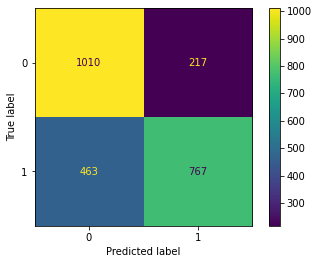

In [16]:
plot_confusion_matrix(bayes_cv_lemma, X_test_cv_lemma, y_test)
# plt.savefig('../images/bayes_test_cv_lemma_CM.png', bbox_in='tight')

In [17]:
bayes_cv_lemma_df = pd.DataFrame([bayes_cv_lemma_dict]).T.rename(columns={0: 'Train/Test cVect nBayes no GS'}, errors="raise")
bayes_cv_lemma_df

,Train/Test cVect nBayes no GS
F1 Score,0.692864
Recall Score,0.623577
Accuracy Score,0.723240
Balanced Accuracy,0.723362
Precision Score,0.779472
True Positive,767.000000
False Negative,463.000000
False Positive,217.000000
True Negative,1010.000000
Calculated Accuracy,0.723240


In [18]:
X_bayes_cv_lemma = MultinomialNB()
X_bayes_cv_lemma.fit(X_cv_lemma, y)
X_bayes_cv_lemma.predict(X_new_cv_lemma)

X_bayes_cv_lemma_dict = print_classification_stats(y_new, X_bayes_cv_lemma.predict(X_new_cv_lemma))
X_bayes_cv_lemma_dict

{'F1 Score': 0.6083001705514497,
 'Recall Score': 0.548155737704918,
 'Accuracy Score': 0.6488277268093782,
 'Balanced Accuracy': 0.6483172197652378,
 'Precision Score': 0.6832694763729247,
 'True Positive': 535,
 'False Negative': 441,
 'False Positive': 248,
 'True Negative': 738,
 'Calculated Accuracy': 0.6488277268093782,
 'Calculated Precision': 0.6832694763729247,
 'Calculated Sensitivity': 0.548155737704918,
 'Calculated Specificity': 0.7484787018255578}

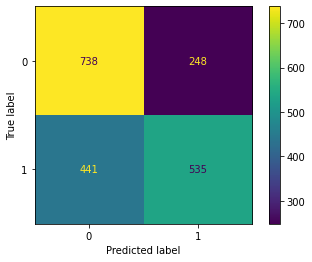

In [19]:
plot_confusion_matrix(X_bayes_cv_lemma, X_new_cv_lemma, y_new)
# plt.savefig('../images/X_bayes_test_cv_lemma_CM.png', bbox_in='tight')

In [20]:
y_new_bayes_cv_lemma_df = pd.DataFrame([X_bayes_cv_lemma_dict]).T.rename(columns={0: 'Xy/new cVect nBayes no GS'}, errors="raise")
y_new_bayes_cv_lemma_df

,Xy/new cVect nBayes no GS
F1 Score,0.608300
Recall Score,0.548156
Accuracy Score,0.648828
Balanced Accuracy,0.648317
Precision Score,0.683269
True Positive,535.000000
False Negative,441.000000
False Positive,248.000000
True Negative,738.000000
Calculated Accuracy,0.648828


## Lemmatized Bayes with TFIDF Vectorization using GridSearch
[(back to top)](#Lemmatizing-Bayes)<br />



In [21]:
gs_tv_nb = GridSearchCV(make_pipeline(TfidfVectorizer(tokenizer=lemmatized), MultinomialNB()), {})
gs_tv_nb.fit(X_train, y_train)
y_gs_tv_nb = gs_tv_nb.predict(X_test)
print_classification_stats(y_test, y_gs_tv_nb)


{'F1 Score': 0.6679227508243053,
 'Recall Score': 0.5764227642276423,
 'Accuracy Score': 0.7130647130647131,
 'Balanced Accuracy': 0.7132317570119466,
 'Precision Score': 0.793952967525196,
 'True Positive': 709,
 'False Negative': 521,
 'False Positive': 184,
 'True Negative': 1043,
 'Calculated Accuracy': 0.7130647130647131,
 'Calculated Precision': 0.793952967525196,
 'Calculated Sensitivity': 0.5764227642276423,
 'Calculated Specificity': 0.850040749796251}

In [22]:
X_gs_tv_nb = GridSearchCV(make_pipeline(TfidfVectorizer(tokenizer=lemmatized), MultinomialNB()), {})
X_gs_tv_nb.fit(X, y)
y_X_gs_tv_nb = X_gs_tv_nb.predict(X_new)
print_classification_stats(y_new, y_X_gs_tv_nb)


{'F1 Score': 0.5861062463514303,
 'Recall Score': 0.514344262295082,
 'Accuracy Score': 0.6386340468909276,
 'Balanced Accuracy': 0.6380037741495694,
 'Precision Score': 0.6811397557666214,
 'True Positive': 502,
 'False Negative': 474,
 'False Positive': 235,
 'True Negative': 751,
 'Calculated Accuracy': 0.6386340468909276,
 'Calculated Precision': 0.6811397557666214,
 'Calculated Sensitivity': 0.514344262295082,
 'Calculated Specificity': 0.7616632860040567}

## Lemmatized Bayes with TFIDF Vectorization without GridSearch
[(back to top)](#Lemmatizing-Bayes)<br />


...and it is the same - which is good! But the values are not better than Logistic Regression.

In [23]:
bayes_tv_lemma = MultinomialNB()
bayes_tv_lemma.fit(X_train_tv_lemma, y_train)

bayes_tv_lemma.predict(X_test_tv_lemma)
# (X_test_cv_lemma.shape, y_test.shape)

bayes_tv_lemma_dict = print_classification_stats(y_test, bayes_tv_lemma.predict(X_test_tv_lemma))
bayes_tv_lemma_dict

{'F1 Score': 0.6679227508243053,
 'Recall Score': 0.5764227642276423,
 'Accuracy Score': 0.7130647130647131,
 'Balanced Accuracy': 0.7132317570119466,
 'Precision Score': 0.793952967525196,
 'True Positive': 709,
 'False Negative': 521,
 'False Positive': 184,
 'True Negative': 1043,
 'Calculated Accuracy': 0.7130647130647131,
 'Calculated Precision': 0.793952967525196,
 'Calculated Sensitivity': 0.5764227642276423,
 'Calculated Specificity': 0.850040749796251}

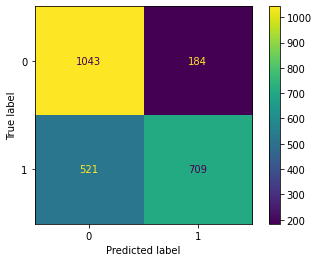

In [25]:
plot_confusion_matrix(bayes_tv_lemma, X_test_tv_lemma, y_test)
# plt.savefig('../images/bayes_test_tv_lemma_CM.png', bbox_in='tight')

In [26]:
bayes_tv_lemma_df = pd.DataFrame([bayes_tv_lemma_dict]).T.rename(columns={0: 'Train/Test tVect nBayes no GS'}, errors="raise")
bayes_tv_lemma_df

,Train/Test tVect nBayes no GS
F1 Score,0.667923
Recall Score,0.576423
Accuracy Score,0.713065
Balanced Accuracy,0.713232
Precision Score,0.793953
True Positive,709.000000
False Negative,521.000000
False Positive,184.000000
True Negative,1043.000000
Calculated Accuracy,0.713065


In [27]:
X_bayes_tv_lemma = MultinomialNB()
X_bayes_tv_lemma.fit(X_tv_lemma, y)
X_bayes_tv_lemma.predict(X_new_tv_lemma)

X_bayes_tv_lemma_dict = print_classification_stats(y_new, X_bayes_tv_lemma.predict(X_new_tv_lemma))
X_bayes_tv_lemma_dict

{'F1 Score': 0.5861062463514303,
 'Recall Score': 0.514344262295082,
 'Accuracy Score': 0.6386340468909276,
 'Balanced Accuracy': 0.6380037741495694,
 'Precision Score': 0.6811397557666214,
 'True Positive': 502,
 'False Negative': 474,
 'False Positive': 235,
 'True Negative': 751,
 'Calculated Accuracy': 0.6386340468909276,
 'Calculated Precision': 0.6811397557666214,
 'Calculated Sensitivity': 0.514344262295082,
 'Calculated Specificity': 0.7616632860040567}

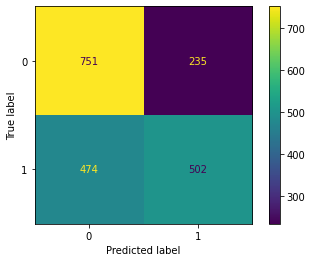

In [28]:
plot_confusion_matrix(X_bayes_tv_lemma, X_new_tv_lemma, y_new)
# plt.savefig('../images/X_bayes_test_tv_lemma_CM.png', bbox_in='tight')

In [31]:
y_new_bayes_tv_lemma_df = pd.DataFrame([X_bayes_tv_lemma_dict]).T.rename(columns={0: 'Xy/new tVect nBayes no GS'}, errors="raise")
y_new_bayes_tv_lemma_df


,Xy/new tVect nBayes no GS
F1 Score,0.586106
Recall Score,0.514344
Accuracy Score,0.638634
Balanced Accuracy,0.638004
Precision Score,0.681140
True Positive,502.000000
False Negative,474.000000
False Positive,235.000000
True Negative,751.000000
Calculated Accuracy,0.638634


# Compare Lemmatized Bayes with non-Lemmatized Bayes
[(back to top)](#Lemmatizing-Bayes)<br />



In [37]:
compare_nb = pd.concat([compare_nb, bayes_cv_lemma_df, y_new_bayes_cv_lemma_df, bayes_tv_lemma_df, y_new_bayes_tv_lemma_df], axis=1)
compare_nb


,Train/Test Tfidf nBayes,Xy/new Tfidf nBayes,Train/Test cVect nBayes no GS,Xy/new cVect nBayes no GS,Train/Test tVect nBayes no GS,Xy/new tVect nBayes no GS
F1 Score,0.706342,0.617551,0.692864,0.608300,0.667923,0.586106
Recall Score,0.660976,0.584016,0.623577,0.548156,0.576423,0.514344
Accuracy,0.724868,0.640163,NaN,NaN,NaN,NaN
Balanced Accuracy,0.724946,0.639878,0.723362,0.648317,0.713232,0.638004
Precision Score,0.758396,0.655172,0.779472,0.683269,0.793953,0.681140
Average Precision Score,0.805360,0.664641,NaN,NaN,NaN,NaN
ROC AUC Score,0.801734,0.693314,NaN,NaN,NaN,NaN
True Positive,968.000000,686.000000,767.000000,535.000000,709.000000,502.000000
False Negative,259.000000,300.000000,463.000000,441.000000,521.000000,474.000000
False Positive,417.000000,406.000000,217.000000,248.000000,184.000000,235.000000


#### The Gridsearch with Tfidf Vectorization and without Lemma-tization yeilded better results.